Memanggil library

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

Menyiapkan Dataframe

In [76]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [78]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [79]:
datetime_columns = ["dteday"]
day_df.sort_values(by="dteday", inplace=True)
day_df.reset_index(inplace=True)

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [80]:
day_df.groupby(by="season").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


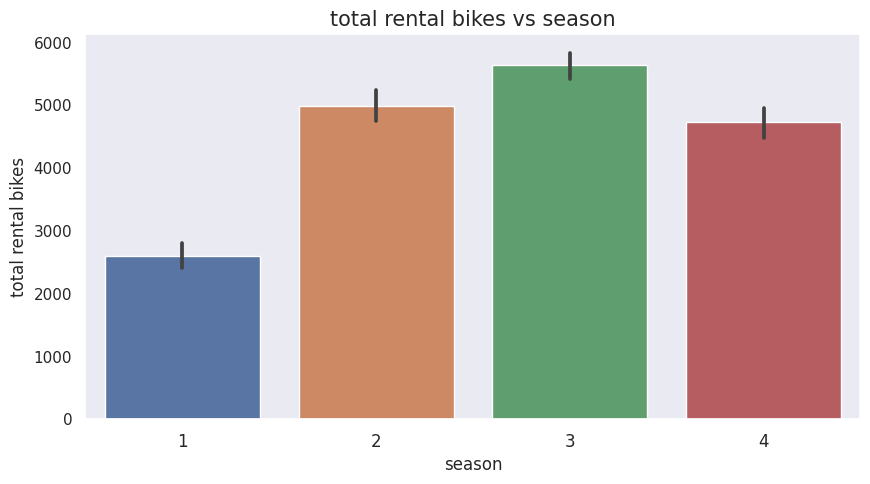

In [81]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=day_df,
)
plt.title("total rental bikes vs season", loc="center", fontsize=15)
plt.ylabel("total rental bikes")
plt.xlabel("season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [82]:
day_df.groupby(by="workingday").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum",
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


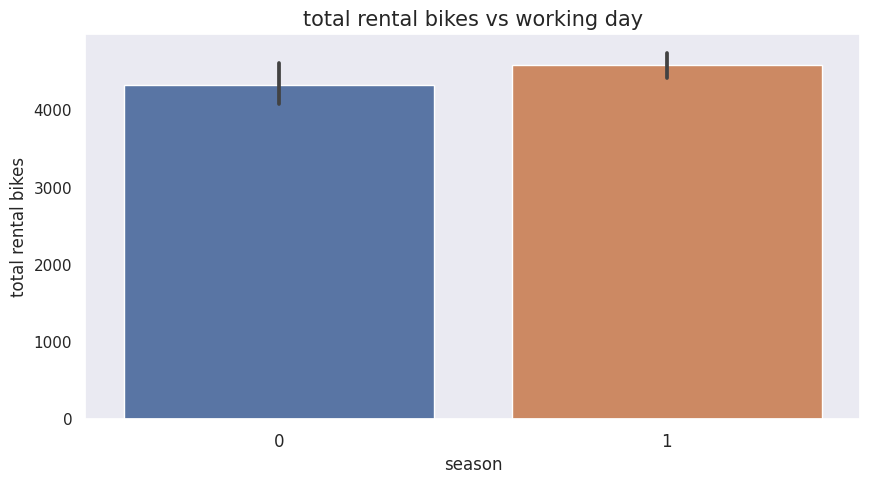

In [83]:
plt.figure(figsize=(10, 5))


sns.barplot(
    y="cnt",
    x="workingday",
    data=day_df,
)
plt.title("total rental bikes vs working day", loc="center", fontsize=15)
plt.ylabel("total rental bikes")
plt.xlabel("season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Membuat Komponen Filter

In [84]:
min_date = day_df["dteday"].min()
max_date = day_df["dteday"].max()

with st.sidebar:

    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
        )

Melengkapi Dashboard dengan Berbagai Visualisasi Data


In [85]:
st.header('Bike Sharing Dataset Dashboard')

DeltaGenerator()

In [86]:
st.subheader('Total Rental Bikes vs Season')

DeltaGenerator()

In [87]:
st.subheader('Daily Orders')

total_orders = day_df.cnt.sum()
st.metric("Total orders", value=total_orders)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    day_df["dteday"],
    day_df["cnt"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
    )
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)

DeltaGenerator()

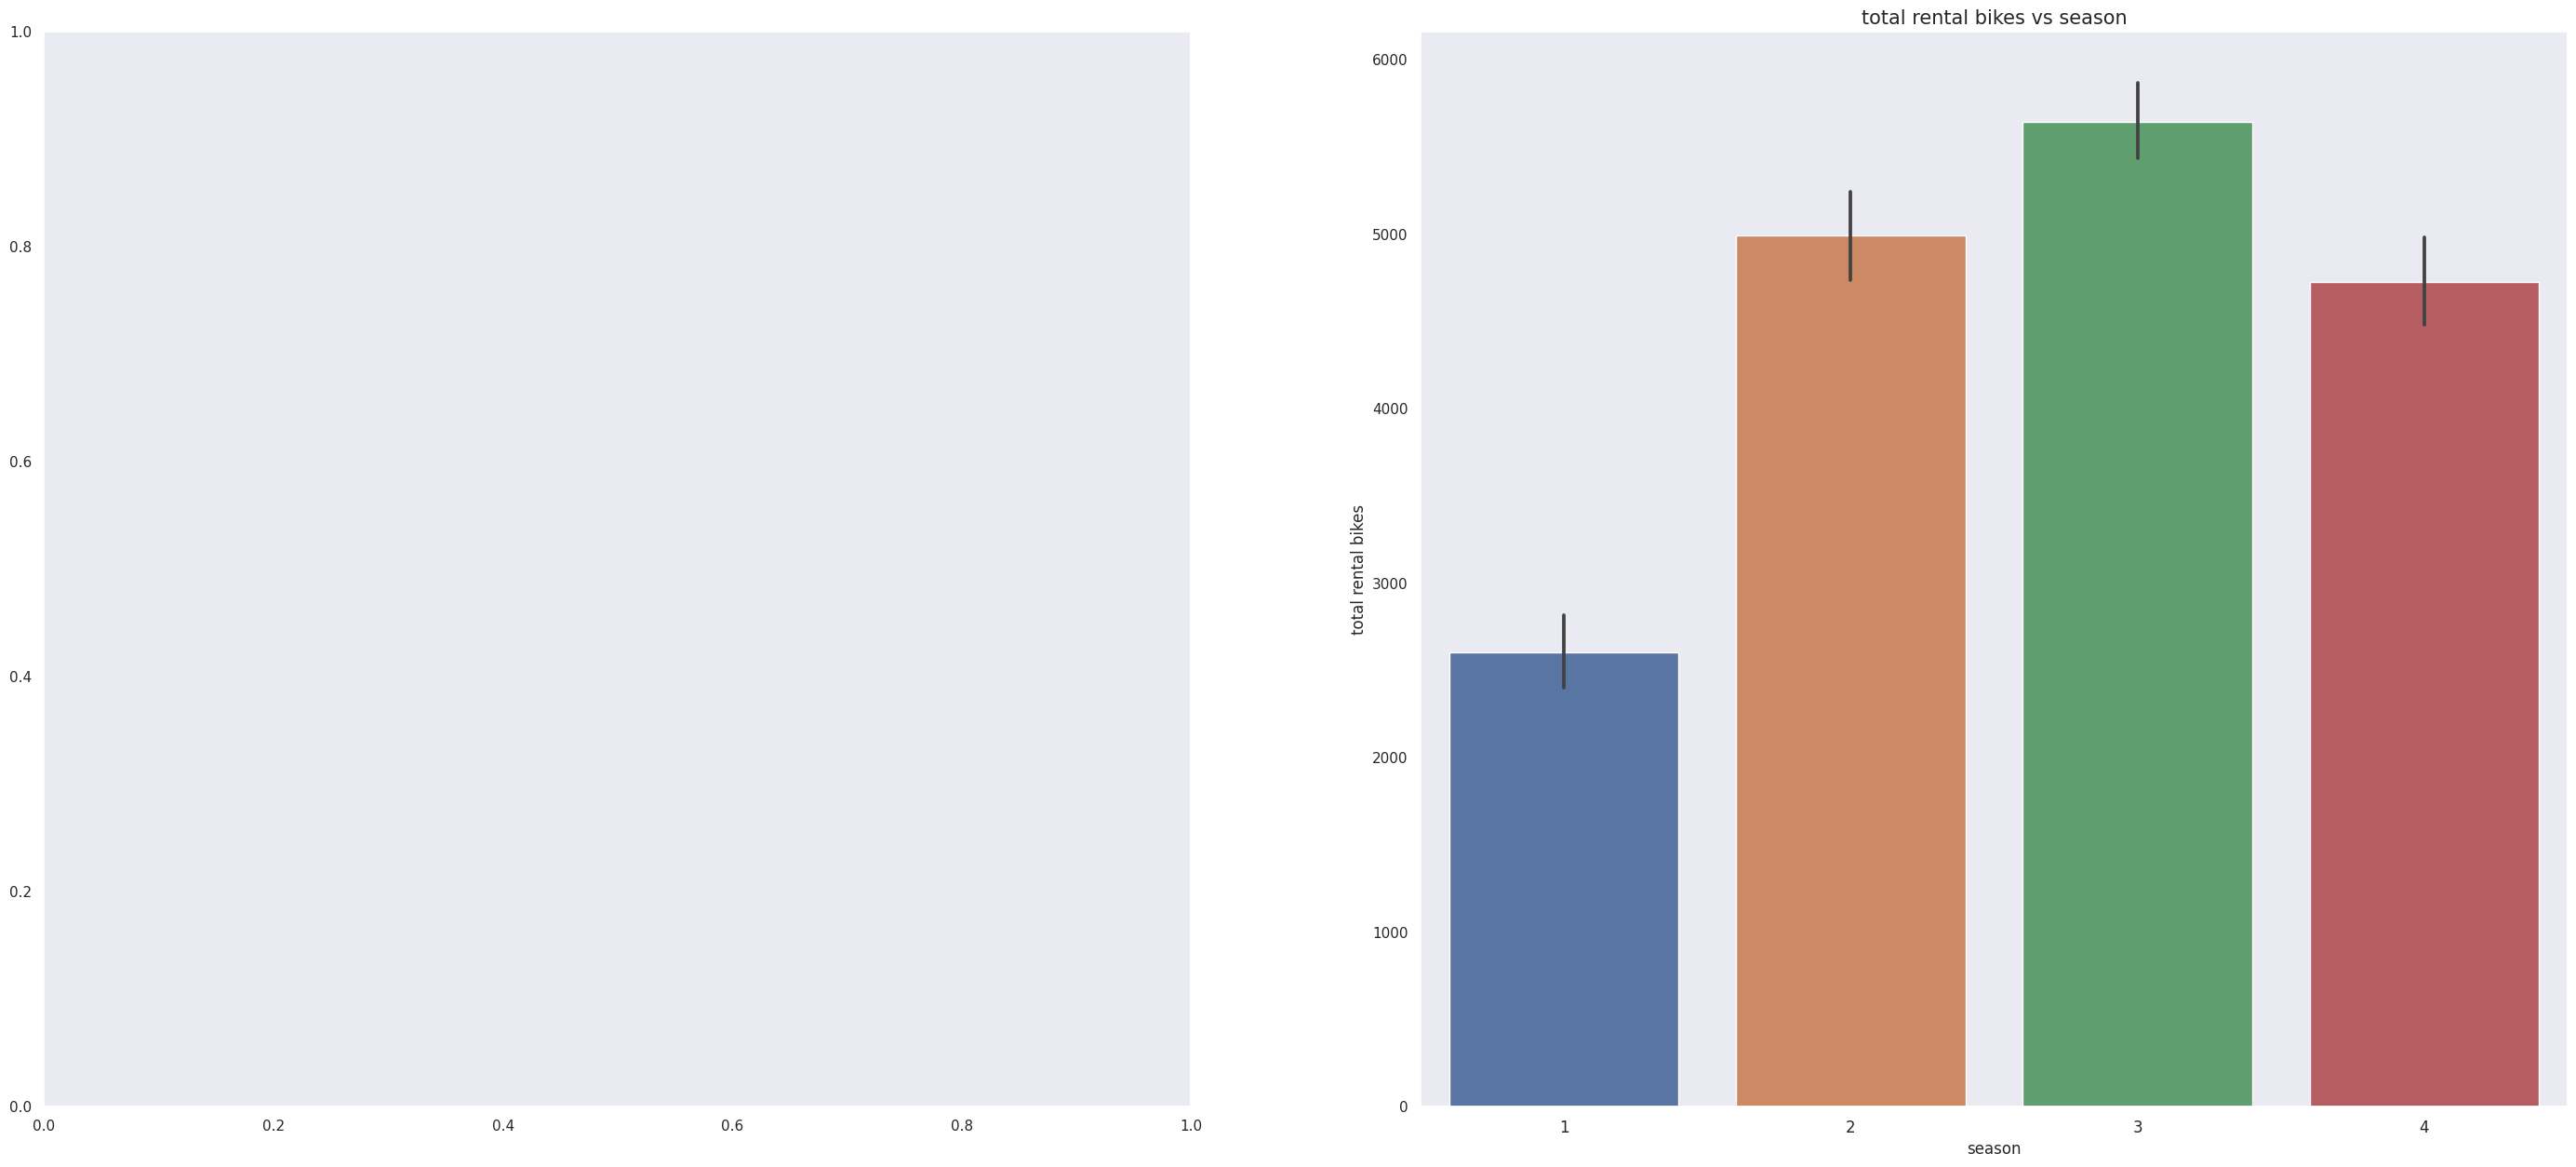

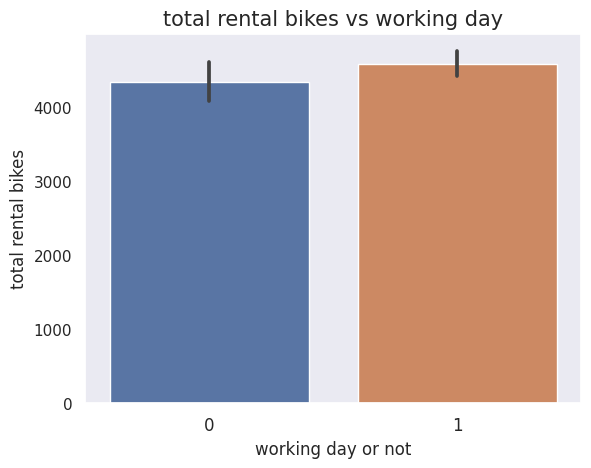

DeltaGenerator()

In [90]:
st.subheader("Total Rental Bikes")
st.subheader("Season = 1:springer, 2:summer, 3:fall, 4:winter")
st.subheader("Working day = if day is neither weekend nor holiday is 1, otherwise is 0.")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
y="cnt",
x="season",
data=day_df,
)
plt.title("total rental bikes vs season", loc="center", fontsize=15)
plt.ylabel("total rental bikes")
plt.xlabel("season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

sns.barplot(
y="cnt",
x="workingday",
data=day_df,
)
plt.title("total rental bikes vs working day", loc="center", fontsize=15)
plt.ylabel("total rental bikes")
plt.xlabel("working day or not")
plt.tick_params(axis='x', labelsize=12)
plt.show()

st.pyplot(fig)